## MELBOURNE HOUSING

Sumber Data : https://drive.google.com/file/d/1ptfLP18cAUGs7ZwAx1CzwGIIki0CTiBu/view?usp=sharing

Melbourne is currently experiencing a housing bubble, (some experts say it may burst soon).

### FEATURES DESCRIPTION

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in Australian dollars

**Method:**
- S - property sold;
- SP - property sold prior;
- PI - property passed in;
- PN - sold prior not disclosed;
- SN - sold not disclosed;
- NB - no bid;
- VB - vendor bid;
- W - withdrawn prior to auction;
- SA - sold after auction;
- SS - sold after auction price not disclosed.
- N/A - price or highest bid not available.

**Type:**
- br - bedroom(s);
- h - house,cottage,villa, semi,terrace;
- u - unit, duplex;
- t - townhouse;
- dev site - development site;
- o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD in Kilometres

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanitory

**Longtitude**: Self explanitory

### IMPORT LIBRARIES

In [15]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### DATA QUALITY CHECKING

In [16]:
# load data
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [17]:
# check head
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [18]:
# check tail
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [19]:
# check shape
df.shape

(34857, 21)

In [20]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [21]:
df = df.drop(columns=["BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Suburb", "Address", "SellerG", "Date"])

In [22]:
# check values of columns
df1 = []
for i in df.columns:
    df1.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values])

df2 = pd.DataFrame(df1, columns=["column", "null values", "unique number", "values"])
df2

,column,null values,unique number,values
0,Rooms,0,12,"[2, 3, 4, 1, 5, 6, 7, 8, 10, 9, 12, 16]"
1,Type,0,3,"[h, u, t]"
2,Price,7610,2871,"[nan, 1480000.0, 1035000.0, 1465000.0, 850000...."
3,Method,0,9,"[SS, S, VB, SP, PI, SN, W, PN, SA]"
4,Distance,1,215,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
5,Postcode,1,211,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."
6,Bedroom2,8217,15,"[2.0, 3.0, 4.0, 6.0, nan, 1.0, 5.0, 7.0, 0.0, ..."
7,Bathroom,8226,11,"[1.0, 2.0, nan, 3.0, 7.0, 4.0, 0.0, 5.0, 6.0, ..."
8,Car,8728,15,"[1.0, 0.0, 2.0, nan, 6.0, 5.0, 4.0, 3.0, 8.0, ..."
9,Landsize,11810,1684,"[126.0, 202.0, 156.0, 0.0, 134.0, 94.0, 120.0,..."


## DATA PREPROCESSING

### MISSING VALUES IDENTIFICATION

In [23]:
# check missing values
df.isna().sum()

Rooms                0
Type                 0
Price             7610
Method               0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

### MISSING VALUES HANDLING

#### PRICE

In [24]:
print("Jumlah missing value :", df["Price"].isna().sum())
print("Presentase missing value :", round(df["Price"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 7610
Presentase missing value : 21.83 %


In [25]:
df_null = df[df["Price"].isna()]
df_not_null = df[df["Price"].notna()]

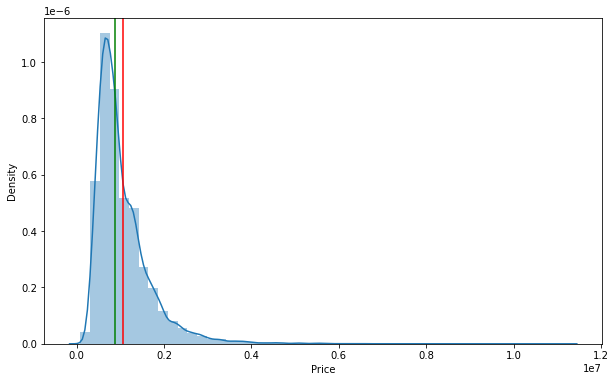

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(df["Price"])
plt.axvline(df["Price"].mean(), color="red")
plt.axvline(df["Price"].median(), color="green")
plt.show()

In [28]:
df_not_null.groupby(["Type", "Rooms"], as_index=False)["Price"].median()

,Type,Rooms,Price
0,h,1,807500.0
1,h,2,941000.0
2,h,3,928000.0
3,h,4,1210000.0
4,h,5,1560000.0
5,h,6,1663000.0
6,h,7,1350000.0
7,h,8,1277500.0
8,h,9,1380000.0
9,h,10,2115000.0


In [29]:
price = []

for Type, Rooms in zip(df_null["Type"], df_null["Rooms"]):
    if Type == "h":
        if Rooms == 1:
            price.append(807500)
        elif Rooms == 2:
            price.append(941000)
        elif Rooms == 3:
            price.append(928000)
        elif Rooms == 4:
            price.append(1210000)
        elif Rooms == 5:
            price.append(1560000)
        elif Rooms == 6:
            price.append(1663000)
        elif Rooms == 7:
            price.append(1350000)
        elif Rooms == 8:
            price.append(1277500)
        elif Rooms == 9:
            price.append(1380000)
        elif Rooms == 10:
            price.append(2115000)
        elif Rooms == 12:
            price.append(2705000)
        else:
            price.append(5000000)
    elif Type == "t":
        if Rooms == 1:
            price.append(532500)
        elif Rooms == 2:
            price.append(669250)
        elif Rooms == 3:
            price.append(875000)
        elif Rooms == 4:
            price.append(1200000)
        else:
            price.append(1100000)
    else:
        if Rooms == 1:
            price.append(385000)
        elif Rooms == 2:
            price.append(590000)
        elif Rooms == 3:
            price.append(777000)
        elif Rooms == 4:
            price.append(895000)
        elif Rooms == 6:
            price.append(520000)
        else:
            price.append(2730000)

In [30]:
df_null["Price"]=price

In [31]:
df = pd.concat([df_not_null, df_null])

In [32]:
df.isna().sum()

Rooms                0
Type                 0
Price                0
Method               0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

#### BEDROOM2

In [33]:
print("Jumlah missing value :", df["Bedroom2"].isna().sum())
print("Presentase missing value :", round(df["Bedroom2"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 8217
Presentase missing value : 23.57 %


In [34]:
df_null = df[df["Bedroom2"].isna()]
df_not_null = df[df["Bedroom2"].notna()]

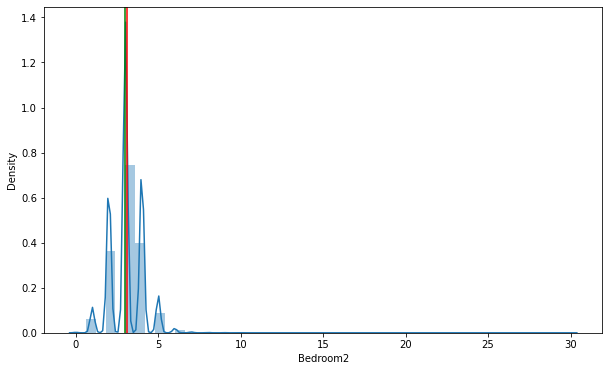

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(df["Bedroom2"])
plt.axvline(df["Bedroom2"].mean(), color="red")
plt.axvline(df["Bedroom2"].median(), color="green")
plt.show()

In [36]:
df_not_null.groupby(["Type", "Rooms"], as_index=False)["Bedroom2"].median()

,Type,Rooms,Bedroom2
0,h,1,1.0
1,h,2,2.0
2,h,3,3.0
3,h,4,4.0
4,h,5,5.0
5,h,6,6.0
6,h,7,7.0
7,h,8,8.0
8,h,9,5.0
9,h,10,10.0


In [37]:
bed = []

for Type, Rooms in zip(df_null["Type"], df_null["Rooms"]):
    if Type == "h":
        if Rooms == 1:
            bed.append(1)
        elif Rooms == 2:
            bed.append(2)
        elif Rooms == 3:
            bed.append(3)
        elif Rooms == 4:
            bed.append(4)
        elif Rooms == 5:
            bed.append(5)
        elif Rooms == 6:
            bed.append(6)
        elif Rooms == 7:
            bed.append(7)
        elif Rooms == 8:
            bed.append(8)
        elif Rooms == 9:
            bed.append(5)
        elif Rooms == 10:
            bed.append(10)
        elif Rooms == 12:
            bed.append(12)
        else:
            bed.append(16)
    elif Type == "t":
        if Rooms == 1:
            bed.append(1)
        elif Rooms == 2:
            bed.append(2)
        elif Rooms == 3:
            bed.append(3)
        elif Rooms == 4:
            bed.append(4)
        elif Rooms == 5:
            bed.append(5)
        else:
            bed.append(8)
    else:
        if Rooms == 1:
            bed.append(1)
        elif Rooms == 2:
            bed.append(2)
        elif Rooms == 3:
            bed.append(3)
        elif Rooms == 4:
            bed.append(4)
        elif Rooms == 5:
            bed.append(5)
        elif Rooms == 6:
            bed.append(4)
        else:
            bed.append(4)

In [38]:
df_null["Bedroom2"]=bed

In [39]:
df = pd.concat([df_not_null, df_null])

In [40]:
df.isna().sum()

Rooms                0
Type                 0
Price                0
Method               0
Distance             1
Postcode             1
Bedroom2             0
Bathroom          8226
Car               8728
Landsize         11810
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

#### BATHROOM

In [41]:
print("Jumlah missing value :", df["Bathroom"].isna().sum())
print("Presentase missing value :", round(df["Bathroom"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 8226
Presentase missing value : 23.6 %


In [42]:
df_null = df[df["Bathroom"].isna()]
df_not_null = df[df["Bathroom"].notna()]

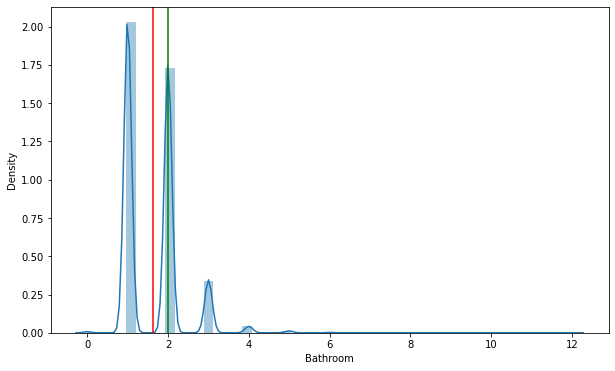

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(df["Bathroom"])
plt.axvline(df["Bathroom"].mean(), color="red")
plt.axvline(df["Bathroom"].median(), color="green")
plt.show()

In [44]:
df_not_null.groupby(["Rooms"], as_index=False)["Bathroom"].median()

,Rooms,Bathroom
0,1,1.0
1,2,1.0
2,3,1.0
3,4,2.0
4,5,3.0
5,6,3.0
6,7,3.0
7,8,3.0
8,9,2.5
9,10,3.0


In [45]:
bath = []

for Rooms in (df_null["Rooms"]):
    if Rooms in [1,2,3] == True:
        bath.append(1)
    elif Rooms == 4:
        bath.append(2)
    elif Rooms in [5,6,7,8,9,10] == True:
        bath.append(3)
    elif Rooms == 12:
        bath.append(5)
    else:
        bath.append(8)

In [46]:
df_null["Bathroom"]=bath

In [47]:
df = pd.concat([df_not_null, df_null])

In [48]:
df.isna().sum()

Rooms                0
Type                 0
Price                0
Method               0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car               8728
Landsize         11810
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

#### CAR

In [49]:
print("Jumlah missing value :", df["Car"].isna().sum())
print("Presentase missing value :", round(df["Car"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 8728
Presentase missing value : 25.04 %


In [50]:
df_null = df[df["Car"].isna()]
df_not_null = df[df["Car"].notna()]

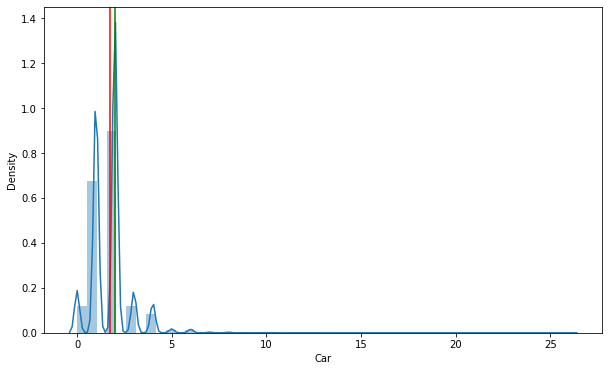

In [51]:
plt.figure(figsize=(10,6))
sns.distplot(df["Car"])
plt.axvline(df["Car"].mean(), color="red")
plt.axvline(df["Car"].median(), color="green")
plt.show()

In [52]:
df_not_null.groupby(["Type", "Rooms"], as_index=False)["Car"].median()

,Type,Rooms,Car
0,h,1,1.0
1,h,2,1.0
2,h,3,2.0
3,h,4,2.0
4,h,5,2.0
5,h,6,2.0
6,h,7,2.0
7,h,8,4.0
8,h,9,5.0
9,h,10,2.0


In [53]:
car = []

for Type, Rooms in zip(df_null["Type"], df_null["Rooms"]):
    if Type == "h":
        if Rooms in [1,2] == True:
            car.append(1)
        elif Rooms in [3,4,5,6,7,10] == True:
            car.append(2)
        elif Rooms == 8:
            car.append(4)
        elif Rooms == 9:
            car.append(5)
        elif Rooms == 12:
            car.append(3)
        else:
            car.append(8)
    elif Type == "t":
        if Rooms in [1,2] == True:
            car.append(1)
        elif Rooms in [3,4,5] == True:
            car.append(2)
        else:
            car.append(3)
    else:
        if Rooms in [1,2,3,6] == True:
            car.append(1)
        elif Rooms in [4,5] == True:
            car.append(2)
        else:
            car.append(8)

In [54]:
df_null["Car"]=car

In [55]:
df = pd.concat([df_not_null, df_null])

In [56]:
df.isna().sum()

Rooms                0
Type                 0
Price                0
Method               0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

#### LANDSIZE

In [57]:
print("Jumlah missing value :", df["Landsize"].isna().sum())
print("Presentase missing value :", round(df["Landsize"].isna().sum()/len(df)*100, 2), "%")

Jumlah missing value : 11810
Presentase missing value : 33.88 %


In [58]:
df_null = df[df["Landsize"].isna()]
df_not_null = df[df["Landsize"].notna()]

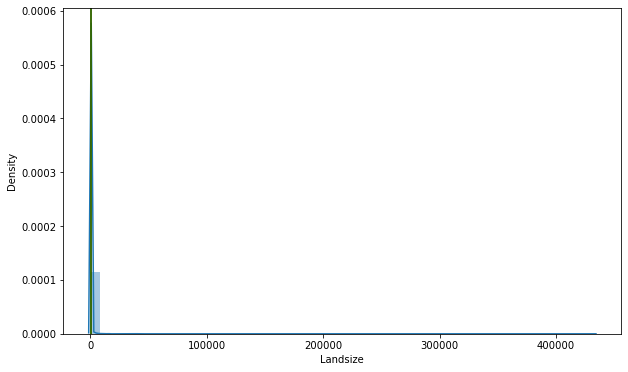

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(df["Landsize"])
plt.axvline(df["Landsize"].mean(), color="red")
plt.axvline(df["Landsize"].median(), color="green")
plt.show()

In [60]:
df_not_null.groupby(["Type", "Car"], as_index=False)["Landsize"].median()

,Type,Car,Landsize
0,h,0.0,235.0
1,h,1.0,447.0
2,h,2.0,604.0
3,h,3.0,639.0
4,h,4.0,669.0
5,h,5.0,671.0
6,h,6.0,704.5
7,h,7.0,650.5
8,h,8.0,232.5
9,h,9.0,721.0


In [61]:
ls = []

for Type, Car in zip(df_null["Type"], df_null["Car"]):
    if Type == "h":
        if Car == 0:
            ls.append(235)
        elif Car == 1:
            ls.append(447)
        elif Car == 2:
            ls.append(604)
        elif Car == 3:
            ls.append(639)
        elif Car == 4:
            ls.append(669)
        elif Car == 5:
            ls.append(671)
        elif Car == 6:
            ls.append(704.5)
        elif Car == 7:
            ls.append(650.5)
        elif Car == 8:
            ls.append(232.5)
        elif Car == 9:
            ls.append(721)
        elif Car == 10:
            ls.append(993)
        elif Car == 11:
            ls.append(853.5)
        elif Car == 12:
            ls.append(835)
        elif Car == 18:
            ls.append(1250)
        else:
            ls.append(267)
    elif Type == "t":
        if Car == 0:
            ls.append(132)
        elif Car == 1:
            ls.append(156)
        elif Car == 2:
            ls.append(242)
        elif Car == 3:
            ls.append(281)
        else:
            ls.append(313)
    else:
        if Car in [0,1] == True:
            ls.append(0)
        elif Car in [2,3] == True:
            ls.append(180)
        elif Car == 4:
            ls.append(287)
        elif Car == 6:
            ls.append(335)
        elif Car == 7:
            ls.append(420)
        else:
            ls.append(309)

In [62]:
df_null["Landsize"]=ls

In [63]:
df = pd.concat([df_not_null, df_null])

In [64]:
df.isna().sum()

Rooms            0
Type             0
Price            0
Method           0
Distance         1
Postcode         1
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      3
Regionname       3
Propertycount    3
dtype: int64

#### BUILDING AREA

In [65]:
print("Jumlah missing value :", df["BuildingArea"].isna().sum())
print("Presentase missing value :", round(df["BuildingArea"].isna().sum()/len(df)*100, 2), "%")

KeyError: 'BuildingArea'

In [ ]:
df = df.drop(columns=["BuildingArea"])

#### YEAR BUILT

In [66]:
print("Jumlah missing value :", df["YearBuilt"].isna().sum())
print("Presentase missing value :", round(df["YearBuilt"].isna().sum()/len(df)*100, 2), "%")

KeyError: 'YearBuilt'

In [54]:
df = df.drop(columns=["YearBuilt"])

**LATTITUDE & LONGTITUDE**

In [67]:
df = df.drop(columns=["Lattitude", "Longtitude"])

KeyError: "['Lattitude', 'Longtitude'] not found in axis"

**Fill in the missing values with a little missing values with 0 or unknown**

In [68]:
df["Distance"] = df["Distance"].fillna(0)
df["Postcode"] = df["Postcode"].fillna(0)
df["CouncilArea"] = df["CouncilArea"].fillna("unknown")
df["Regionname"] = df["Regionname"].fillna("unknown")
df["Propertycount"] = df["Propertycount"].fillna(0)

In [69]:
df.isna().sum()

Rooms            0
Type             0
Price            0
Method           0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

### OUTLIER IDENTIFICATION

#### IDENTIFICATION IN VISUAL WITH BOX PLOT

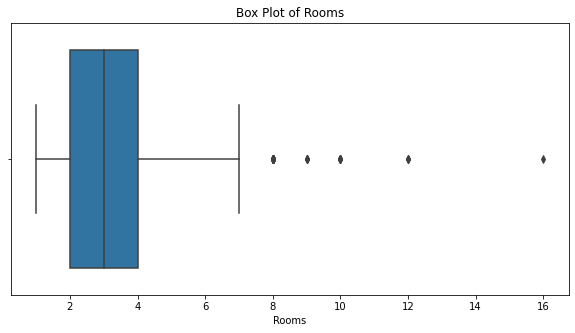

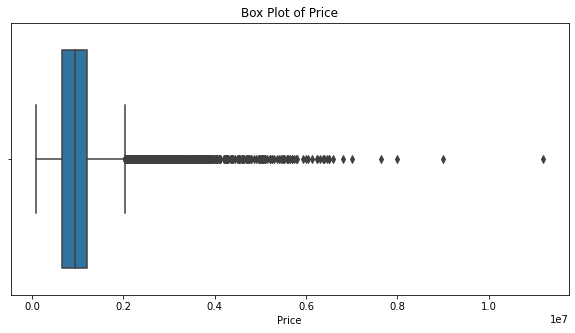

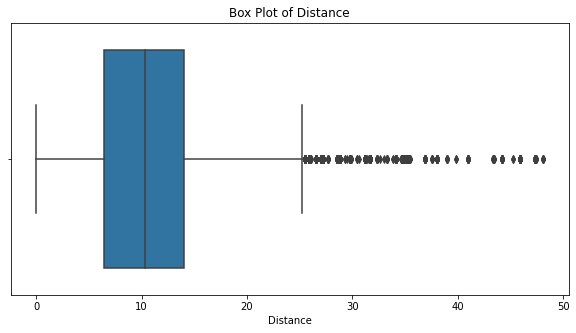

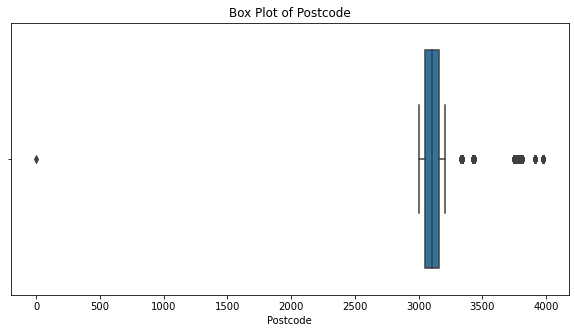

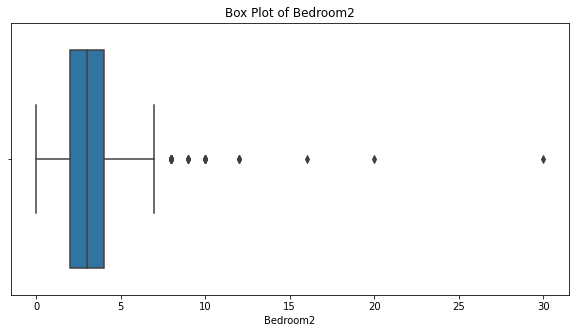

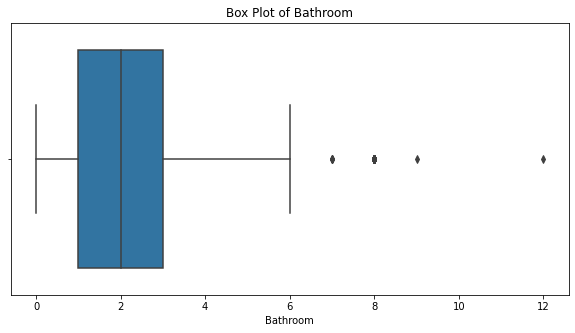

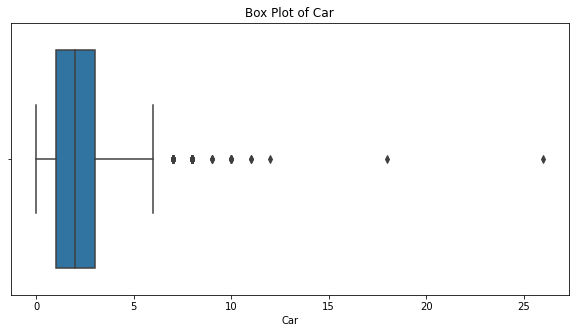

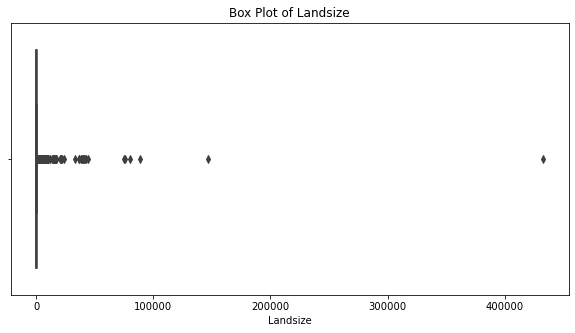

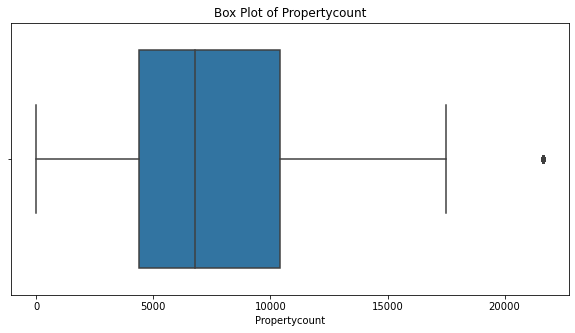

In [70]:
for i in df.columns[df.dtypes != object]:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x=i)
    plt.title(f"Box Plot of {i}")
    plt.show()

#### DETECTING OUTLIER WITH IQR

In [71]:
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    IQR = Q3-Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    
    low_out =[]
    upper_out = []
    
    for i in data:
        if(i<min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            upper_out.append(i)
    return low_out, upper_out

#### 1. ROOMS

In [72]:
lower_out = find_outlier(df["Rooms"])[0]
upper_out = find_outlier(df["Rooms"])[1]

In [73]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 34857
Jumlah outlier : 33
Presentase outlier : 0.09 %


In [74]:
df = df[df["Rooms"] < min(upper_out)]

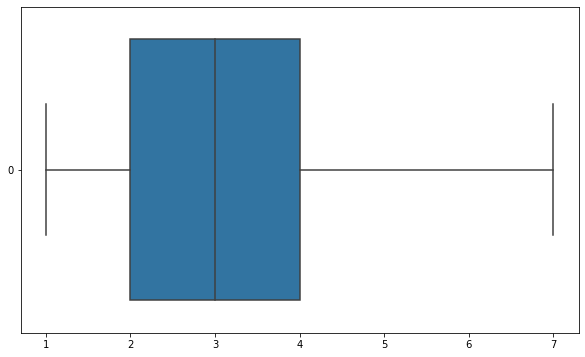

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Rooms"], orient="h")
plt.show()

#### 2. PRICE

In [76]:
lower_out = find_outlier(df["Price"])[0]
upper_out = find_outlier(df["Price"])[1]

In [77]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 34824
Jumlah outlier : 1780
Presentase outlier : 5.11 %


In [78]:
df = df[df["Price"] < min(upper_out)]

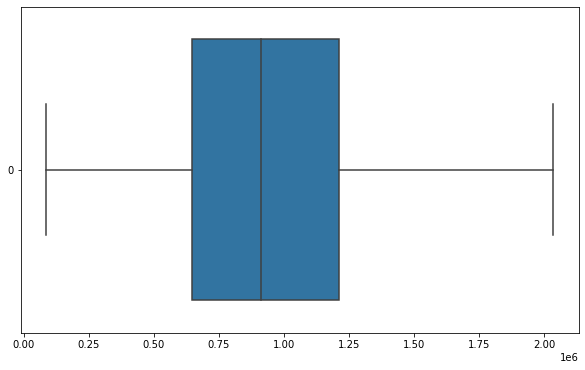

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Price"], orient="h")
plt.show()

#### 3. DISTANCE

In [80]:
lower_out = find_outlier(df["Distance"])[0]
upper_out = find_outlier(df["Distance"])[1]

In [81]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 33044
Jumlah outlier : 1269
Presentase outlier : 3.84 %


In [82]:
df = df[df["Distance"] < min(upper_out)]

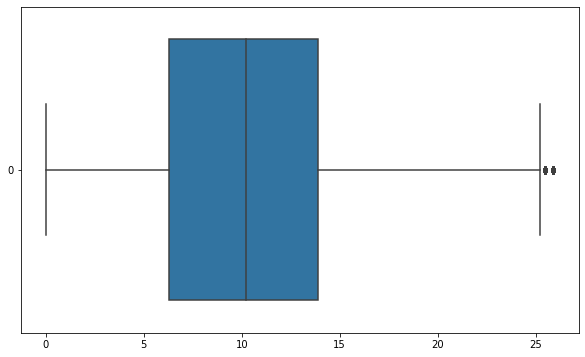

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Distance"], orient="h")
plt.show()

In [84]:
lower_out = find_outlier(df["Distance"])[0]
upper_out = find_outlier(df["Distance"])[1]

In [85]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31775
Jumlah outlier : 195
Presentase outlier : 0.61 %


In [86]:
df = df[df["Distance"] < min(upper_out)]

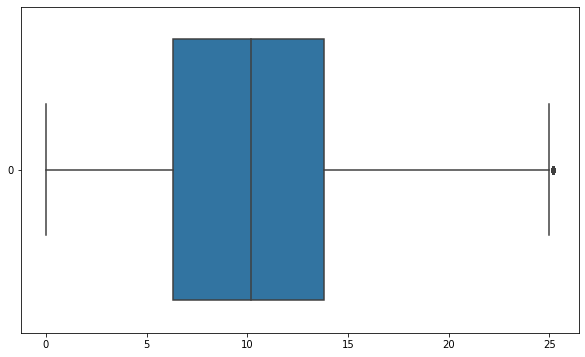

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Distance"], orient="h")
plt.show()

In [88]:
lower_out = find_outlier(df["Distance"])[0]
upper_out = find_outlier(df["Distance"])[1]

In [89]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31580
Jumlah outlier : 44
Presentase outlier : 0.14 %


In [90]:
df = df[df["Distance"] < min(upper_out)]

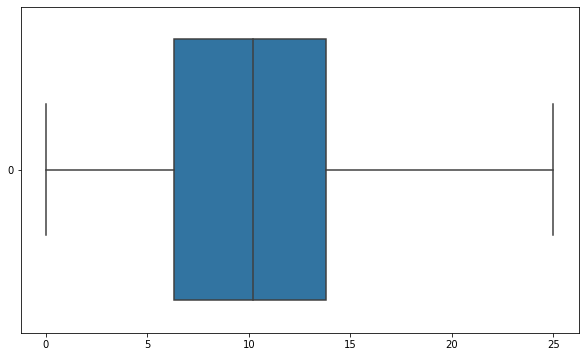

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Distance"], orient="h")
plt.show()

#### 4. POSTCODE

In [92]:
lower_out = find_outlier(df["Postcode"])[0]
upper_out = find_outlier(df["Postcode"])[1]

In [93]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31536
Jumlah outlier : 129
Presentase outlier : 0.41 %


In [94]:
df = df[(df["Postcode"] < min(upper_out)) & (df["Postcode"] > min(lower_out))]

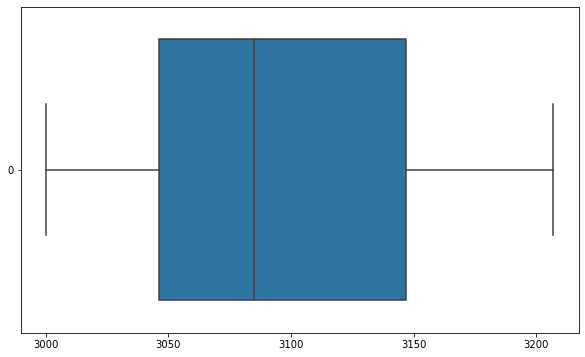

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Postcode"], orient="h")
plt.show()

#### 5. BEDROOM

In [96]:
lower_out = find_outlier(df["Bedroom2"])[0]
upper_out = find_outlier(df["Bedroom2"])[1]

In [97]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 31407
Jumlah outlier : 1428
Presentase outlier : 4.55 %


In [98]:
df = df[df["Bedroom2"] < min(upper_out)]

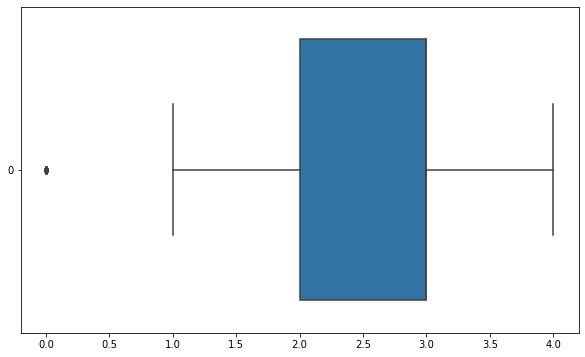

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Bedroom2"], orient="h")
plt.show()

In [100]:
lower_out = find_outlier(df["Bedroom2"])[0]
upper_out = find_outlier(df["Bedroom2"])[1]

In [101]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 29995
Jumlah outlier : 16
Presentase outlier : 0.05 %


In [102]:
df = df[df["Bedroom2"] > min(lower_out)]

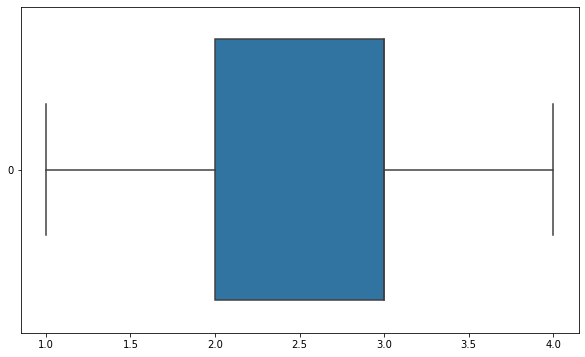

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Bedroom2"], orient="h")
plt.show()

#### 6. BATHROOM

In [104]:
lower_out = find_outlier(df["Bathroom"])[0]
upper_out = find_outlier(df["Bathroom"])[1]

In [105]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 29979
Jumlah outlier : 6252
Presentase outlier : 20.85 %


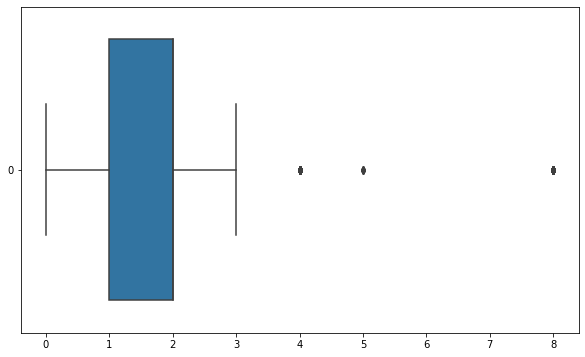

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Bathroom"], orient="h")
plt.show()

In [107]:
iqr = df["Bathroom"].quantile(.75) - df["Bathroom"].quantile(.25)
up_limit = df["Bathroom"].quantile(.75)+1.5*iqr
print("Upper Limit :", up_limit)

Upper Limit : 3.5


In [108]:
df["Bathroom"].quantile(.79)

3.0

In [109]:
df1 = df.copy()
df1["Bathroom_fin"] = stats.mstats.winsorize(df["Bathroom"], limits=(0, .21))

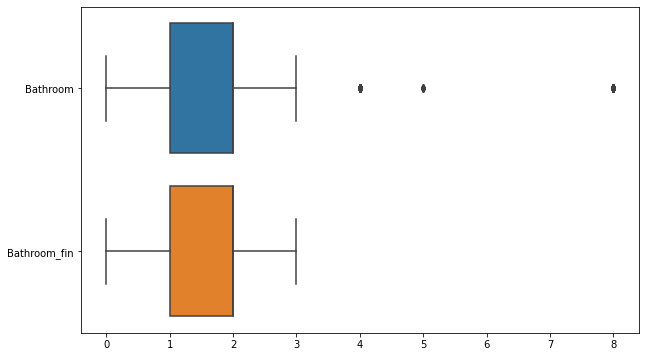

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1[["Bathroom", "Bathroom_fin"]], orient="h")
plt.show()

In [111]:
df1 = df

#### 7. CAR

In [112]:
lower_out = find_outlier(df["Car"])[0]
upper_out = find_outlier(df["Car"])[1]

In [113]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 29979
Jumlah outlier : 6305
Presentase outlier : 21.03 %


In [114]:
iqr = df["Car"].quantile(.75) - df["Car"].quantile(.25)
up_limit = df["Car"].quantile(.75)+1.5*iqr
print("Upper Limit :", up_limit)

Upper Limit : 6.0


In [115]:
df["Car"].quantile(.78)

4.0

In [116]:
df1 = df.copy()
df1["Car_fin"] = stats.mstats.winsorize(df["Car"], limits=(0, .22))

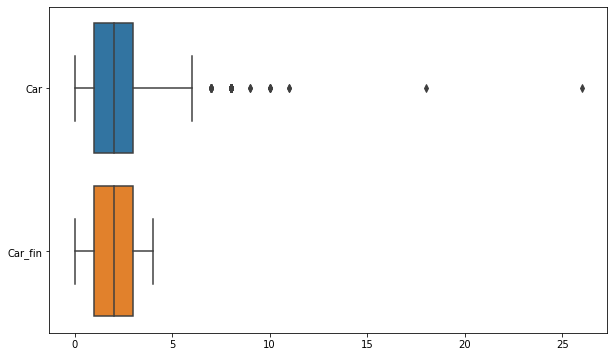

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1[["Car", "Car_fin"]], orient="h")
plt.show()

In [118]:
df1 = df

#### 8. LANDSIZE

In [119]:
lower_out = find_outlier(df["Landsize"])[0]
upper_out = find_outlier(df["Landsize"])[1]

In [120]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 29979
Jumlah outlier : 559
Presentase outlier : 1.86 %


In [121]:
df = df[df["Landsize"] < min(upper_out)]

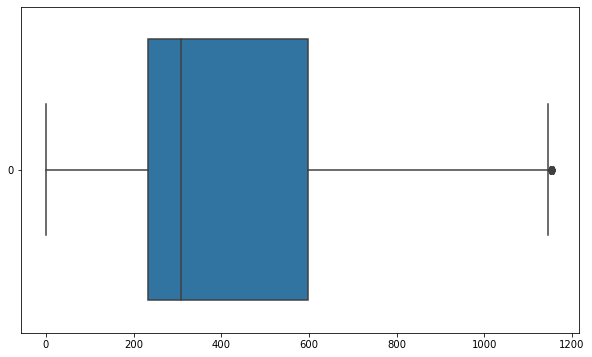

In [122]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Landsize"], orient="h")
plt.show()

In [123]:
lower_out = find_outlier(df["Landsize"])[0]
upper_out = find_outlier(df["Landsize"])[1]

In [124]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 29420
Jumlah outlier : 11
Presentase outlier : 0.04 %


In [125]:
df = df[df["Landsize"] < min(upper_out)]

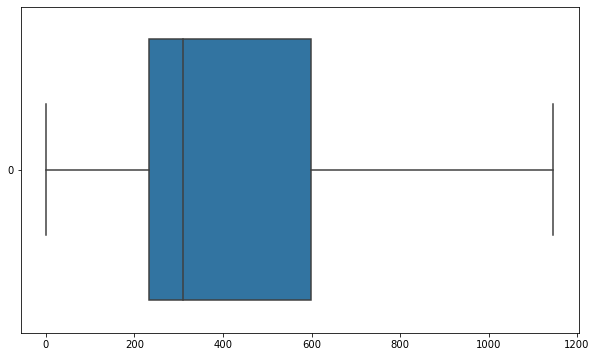

In [126]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Landsize"], orient="h")
plt.show()

#### 9. PROPERTYCOUNT

In [127]:
lower_out = find_outlier(df["Propertycount"])[0]
upper_out = find_outlier(df["Propertycount"])[1]

In [128]:
print("Jumlah data :", len(df))
print("Jumlah outlier :", len(lower_out)+len(upper_out))
print("Presentase outlier :", round((len(lower_out)+len(upper_out))/len(df)*100, 2), "%")

Jumlah data : 29409
Jumlah outlier : 819
Presentase outlier : 2.78 %


In [129]:
df = df[df["Propertycount"] < min(upper_out)]

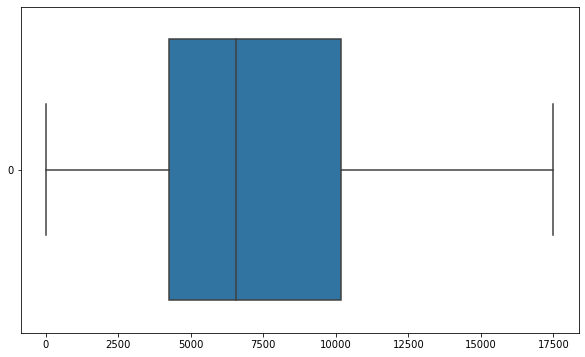

In [130]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df["Propertycount"], orient="h")
plt.show()

### OVERVIEW ALL

In [116]:
df1 = []
for i in df.columns:
    df1.append([i, df[i].isna().sum(), df[i].nunique(), df[i].drop_duplicates().values])

df2 = pd.DataFrame(df1, columns=["column", "null values", "unique number", "values"])
df2

,column,null values,unique number,values
0,Suburb,0,267,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,0,28822,"[85 Turner St, 25 Bloomburg St, 5 Charles St, ..."
2,Rooms,0,6,"[2, 3, 4, 1, 5, 6]"
3,Type,0,3,"[h, u, t]"
4,Price,0,2286,"[1480000.0, 1035000.0, 1465000.0, 850000.0, 16..."
5,Method,0,9,"[S, SP, PI, VB, SA, SS, SN, PN, W]"
6,SellerG,0,340,"[Biggin, Nelson, Jellis, Greg, LITTLE, Collins..."
7,Date,0,78,"[3/12/2016, 4/02/2016, 4/03/2017, 4/06/2016, 7..."
8,Distance,0,165,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,0,155,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   column         17 non-null     object
 1   null values    17 non-null     int64 
 2   unique number  17 non-null     int64 
 3   values         17 non-null     object
dtypes: int64(2), object(2)
memory usage: 672.0+ bytes


In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,28590.0,2.864813,0.819899,1.0,2.0,3.0,3.0,6.0
Price,28590.0,940385.159916,368522.863182,85000.0,655000.0,920000.0,1210000.0,2035000.0
Distance,28590.0,10.224127,5.188696,0.0,6.2,9.7,13.8,25.0
Postcode,28590.0,3098.652851,59.869970,3000.0,3044.0,3087.0,3148.0,3207.0
Bedroom2,28590.0,2.850192,0.811039,1.0,2.0,3.0,3.0,4.0
Bathroom,28590.0,2.879363,2.672716,0.0,1.0,2.0,2.0,8.0
Car,28590.0,3.058587,2.707136,0.0,1.0,2.0,3.0,26.0
Landsize,28590.0,385.697167,233.837811,0.0,232.5,309.0,598.0,1146.0
Propertycount,28590.0,7195.575761,3862.945368,0.0,4258.0,6543.0,10175.0,17496.0


# Feature Engineering

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28590 entries, 1 to 34829
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          28590 non-null  int64  
 1   Type           28590 non-null  object 
 2   Price          28590 non-null  float64
 3   Method         28590 non-null  object 
 4   Distance       28590 non-null  float64
 5   Postcode       28590 non-null  float64
 6   Bedroom2       28590 non-null  float64
 7   Bathroom       28590 non-null  float64
 8   Car            28590 non-null  float64
 9   Landsize       28590 non-null  float64
 10  CouncilArea    28590 non-null  object 
 11  Regionname     28590 non-null  object 
 12  Propertycount  28590 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 4.1+ MB


In [133]:
df_cut =df.copy()

In [134]:
# cek data terlebih dahulu untuk mengetahui threshold
df_cut.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,28590.0,2.864813,0.819899,1.0,2.0,3.0,3.0,6.0
Price,28590.0,940385.159916,368522.863182,85000.0,655000.0,920000.0,1210000.0,2035000.0
Distance,28590.0,10.224127,5.188696,0.0,6.2,9.7,13.8,25.0
Postcode,28590.0,3098.652851,59.869970,3000.0,3044.0,3087.0,3148.0,3207.0
Bedroom2,28590.0,2.850192,0.811039,1.0,2.0,3.0,3.0,4.0
Bathroom,28590.0,2.879363,2.672716,0.0,1.0,2.0,2.0,8.0
Car,28590.0,3.058587,2.707136,0.0,1.0,2.0,3.0,26.0
Landsize,28590.0,385.697167,233.837811,0.0,232.5,309.0,598.0,1146.0
Propertycount,28590.0,7195.575761,3862.945368,0.0,4258.0,6543.0,10175.0,17496.0


## Price Binning

In [153]:
# contoh feature binning dengan pandas
# buat labels
cut_labels = ["0", "1", "2", " 3"]

# buat bin edges
cut_bins = [0, 500000, 1000000, 1500000, 2500000]

In [136]:
df_cut['cut_price'] = pd.cut(df_cut['Price'], bins=cut_bins, labels = cut_labels)

In [137]:
df_cut.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price
1,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m
2,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m
4,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m
5,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,500k-1m
6,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,more than 1.5 m


### Landsize  Binning

In [131]:
# contoh feature binning dengan pandas
# buat labels
cut_labels1 = ["Small", "Medium", "Spacious", "Very spacious"]

# buat bin edges
cut_bins1 = [0,232.5,309,598,1146]

In [198]:
df_cut['cut_landsize'] = pd.cut(df_cut['Landsize'], bins=cut_bins1, labels = cut_labels1)

## Propertycount  Binning

In [138]:
# buat labels
cut_labels2 = [0,1,2,3]
# 0 = sedikit
# 1 = mediocre
# 2 = many
# 3 = many many

# buat bin edges
cut_bins2 = [0, 5000, 7500, 10000, 25000]


In [139]:
df_cut['cut_propertycount'] = pd.cut(df_cut['Propertycount'], bins=cut_bins2, labels = cut_labels2)

In [ ]:
# DIstance

In [140]:
# buat labels
cut_labels3 = [0,1,2]
# 0 = less than 10 km
# 1 = 10-20 km
# 2 = 20-30 km

# buat bin edges
cut_bins3 = [0, 10, 20, 30]

In [141]:
df_cut['cut_distance'] = pd.cut(df_cut['Distance'], bins=cut_bins2, labels = cut_labels2)

# Scaling 

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [143]:
# copy dataframe
df_scl = df.copy()

# feature yang dapat di scaling
df_scl = df_scl[["Price", "Landsize"]]

In [144]:
# import library untuk encoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [145]:
# copy dataframe
df_scl = df.copy()

# feature yang dapat di scaling
df_scl = df_scl[["Price", "Landsize"]]

In [146]:
# cek hasil
df_scl.head()

,Price,Landsize
1,1480000.0,202.0
2,1035000.0,156.0
4,1465000.0,134.0
5,850000.0,94.0
6,1600000.0,120.0


In [147]:
# contoh MinMax scaler
scaler = MinMaxScaler()
print(scaler)

MinMaxScaler()


In [ ]:
### Pricescaling & landsize

In [148]:
df_scl["Price_minmax"] = scaler.fit_transform(df_scl[["Price"]])

In [149]:
df_scl["Landsize_minmax"] = scaler.fit_transform(df_scl[["Landsize"]])

In [150]:
df_scl.head()

,Price,Landsize,Price_minmax,Landsize_minmax
1,1480000.0,202.0,0.715385,0.176265
2,1035000.0,156.0,0.487179,0.136126
4,1465000.0,134.0,0.707692,0.116928
5,850000.0,94.0,0.392308,0.082024
6,1600000.0,120.0,0.776923,0.104712


In [151]:
df_cut["Price_minmax"] = scaler.fit_transform(df_cut[["Price"]])
df_cut["Landsize_minmax"] = scaler.fit_transform(df_cut[["Landsize"]])

In [155]:
df_cut.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price,cut_propertycount,cut_distance,Price_minmax,Landsize_minmax
1,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0.715385,0.176265
2,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0.487179,0.136126
4,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0.707692,0.116928
5,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,500k-1m,0,0,0.392308,0.082024
6,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,more than 1.5 m,0,0,0.776923,0.104712


# Encoding

In [156]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [157]:
# contoh dengan pandas
df_enc = df_cut.copy()

In [158]:
df_enc.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,cut_price,cut_propertycount,cut_distance,Price_minmax,Landsize_minmax
1,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0.715385,0.176265
2,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0.487179,0.136126
4,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0.707692,0.116928
5,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,500k-1m,0,0,0.392308,0.082024
6,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,more than 1.5 m,0,0,0.776923,0.104712


In [159]:
df_enc["Type"] = df_enc["Type"].astype(object)

In [160]:
# contoh dengan ordinal encoder, gunakan fit_transform untuk encode data
df_enc["Type_enc"] = OrdinalEncoder().fit_transform(df_enc[["Type"]])

In [197]:
# cek hasil
df_enc.groupby(["Type", "Type_enc"])["Price"].count()

Type  Type_enc
h     0.0         18652
t     1.0          3314
u     2.0          6624
Name: Price, dtype: int64

In [240]:
df_merged = pd.concat([df_cut, df_enc['Type_enc']])

In [245]:
df_merged

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Regionname,Propertycount,cut_price,Price_minmax,Landsize_minmax,cut_landsize,cut_propertycount,cut_distance,0
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0.0,0.176265,Very Narrow,0,0,NaN
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0.0,0.136126,Very Narrow,0,0,NaN
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra City Council,Northern Metropolitan,4019.0,1m - 1.5m,0.0,0.116928,Very Narrow,0,0,NaN
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra City Council,Northern Metropolitan,4019.0,500k-1m,0.0,0.082024,Very Narrow,0,0,NaN
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra City Council,Northern Metropolitan,4019.0,more than 1.5 m,0.0,0.104712,Very Narrow,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
34779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
34792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
34813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [162]:
le = LabelEncoder()
print(le)

LabelEncoder()


In [172]:
# contoh label encoding, gunakan fit_transform untuk encode data
df_cut["Method_enc"] = le.fit_transform(df_cut[["Method"]])
df_cut["Regionname_enc"] = le.fit_transform(df_cut[["Regionname"]])
df_cut["CouncilArea_enc"] = le.fit_transform(df_cut [["CouncilArea"]])

In [173]:
df_cut["Method"] = df_cut["Method"].astype(object)
df_cut["Regionname"] = df_cut["Regionname"].astype(object)
df_cut["CouncilArea"] = df_cut["CouncilArea"].astype(object)

In [174]:
df_cut.groupby(["Method", "Method_enc"])["cut_price"].count()
df_cut.groupby(["Regionname", "Regionname_enc"])["cut_price"].count()
df_cut.groupby(["CouncilArea", "CouncilArea_enc"])["cut_price"].count()

CouncilArea                     CouncilArea_enc
Banyule City Council            0                  1697
Bayside City Council            1                  1389
Boroondara City Council         2                  2674
Brimbank City Council           3                  1507
Darebin City Council            4                  1910
Glen Eira City Council          5                  1851
Greater Dandenong City Council  6                   260
Hobsons Bay City Council        7                   875
Hume City Council               8                   972
Kingston City Council           9                   666
Knox City Council               10                  306
Manningham City Council         11                  893
Maribyrnong City Council        12                 1388
Maroondah City Council          13                  427
Melbourne City Council          14                 1712
Melton City Council             15                  106
Monash City Council             16                 1282


In [158]:
# contoh dengan ordinal encoder, gunakan fit_transform untuk encode data
df_enc["cut_price_enc"] = OrdinalEncoder().fit_transform(df_enc[["cut_price"]])

In [175]:
# cek data terlebih dahulu untuk mengetahui threshold
df_cut.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,28590.0,2.864813,0.819899,1.0,2.00000,3.000000,3.000000e+00,6.0
Price,28590.0,940385.159916,368522.863182,85000.0,655000.00000,920000.000000,1.210000e+06,2035000.0
Distance,28590.0,10.224127,5.188696,0.0,6.20000,9.700000,1.380000e+01,25.0
Postcode,28590.0,3098.652851,59.869970,3000.0,3044.00000,3087.000000,3.148000e+03,3207.0
Bedroom2,28590.0,2.850192,0.811039,1.0,2.00000,3.000000,3.000000e+00,4.0
Bathroom,28590.0,2.879363,2.672716,0.0,1.00000,2.000000,2.000000e+00,8.0
Car,28590.0,3.058587,2.707136,0.0,1.00000,2.000000,3.000000e+00,26.0
Landsize,28590.0,385.697167,233.837811,0.0,232.50000,309.000000,5.980000e+02,1146.0
Propertycount,28590.0,7195.575761,3862.945368,0.0,4258.00000,6543.000000,1.017500e+04,17496.0
Price_minmax,28590.0,0.000140,0.011828,0.0,0.00000,0.000000,0.000000e+00,1.0


# Feature Selection

In [163]:
# import library
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

In [176]:
df_cut.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Regionname,Propertycount,cut_price,cut_propertycount,cut_distance,Price_minmax,Landsize_minmax,Method_enc,Regionname_enc,CouncilArea_enc
1,2,h,1480000,S,2.5,3067.0,2.0,1.0,1.0,202.0,...,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0,0.176265,2,1,25
2,2,h,1035000,S,2.5,3067.0,2.0,1.0,0.0,156.0,...,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0,0.136126,2,1,25
4,3,h,1465000,SP,2.5,3067.0,3.0,2.0,0.0,134.0,...,Northern Metropolitan,4019.0,1m - 1.5m,0,0,0,0.116928,5,1,25
5,3,h,850000,PI,2.5,3067.0,3.0,2.0,1.0,94.0,...,Northern Metropolitan,4019.0,500k-1m,0,0,0,0.082024,0,1,25
6,4,h,1600000,VB,2.5,3067.0,3.0,1.0,2.0,120.0,...,Northern Metropolitan,4019.0,more than 1.5 m,0,0,0,0.104712,7,1,25


In [205]:
df_cut.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28590 entries, 1 to 34829
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rooms              28590 non-null  int64   
 1   Type               28590 non-null  object  
 2   Price              28590 non-null  int64   
 3   Method             28590 non-null  object  
 4   Distance           28590 non-null  int64   
 5   Postcode           28590 non-null  int64   
 6   Bedroom2           28590 non-null  int64   
 7   Bathroom           28590 non-null  int64   
 8   Car                28590 non-null  int64   
 9   Landsize           28590 non-null  int64   
 10  CouncilArea        28590 non-null  object  
 11  Regionname         28590 non-null  object  
 12  Propertycount      28590 non-null  float64 
 13  cut_price          28590 non-null  category
 14  cut_propertycount  28588 non-null  category
 15  cut_distance       28515 non-null  category
 16  Pric

In [166]:
# split dependent dan independent (target)
X = df_cut.drop(columns=["Price_minmax"]) # independent feature, non target
y = df_cut["Price_minmax"] #target


In [198]:
df_cut['Distance'] = df_cut['Distance'].astype('int64')
df_cut['Postcode'] = df_cut['Postcode'].astype('int64')
df_cut['Bedroom2'] = df_cut['Bedroom2'].astype('int64')
df_cut['Car'] = df_cut['Car'].astype('int64')
df_cut['Bathroom'] = df_cut['Bathroom'].astype('int64')


In [204]:
df_cut['Landsize_minmax'] = df_cut['Landsize_minmax'].astype('category')



In [ ]:
df_cut['cut_propertycount'] = df_cut['cut_propertycount'].astype('int64')

In [194]:
df_cut["Price_minmax"] = df_cut["Price_minmax"].astype('int64')
df_cut["Price"] = df_cut["Price"].astype('int64')
df_cut["Method_enc"] = df_cut["Method_enc"].astype('int64')
df_cut["Regionname_enc"] = df_cut["Regionname_enc"].astype('int64')
df_cut["CouncilArea_enc"] = df_cut["CouncilArea_enc"].astype('int64')

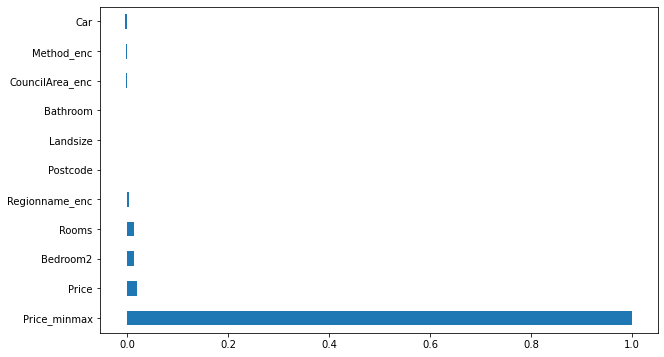

In [206]:
# dengan korelasi
plt.figure(figsize=(10,6))
df_cut.corr("spearman")["Price_minmax"].sort_values(ascending=False).head(11).plot(kind = 'barh')
plt.show()

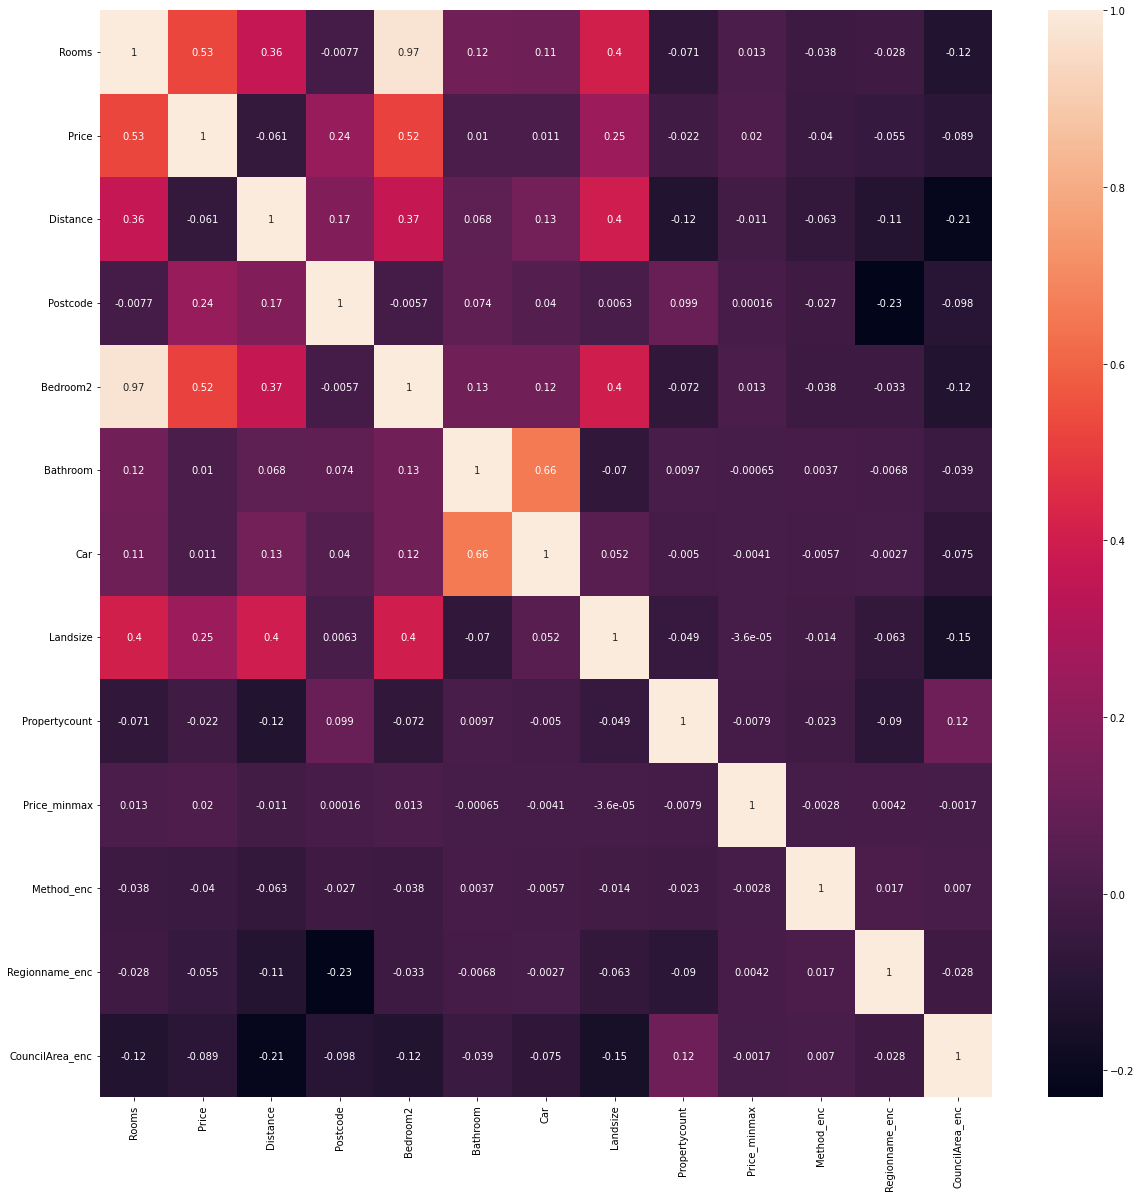

In [207]:
# contoh korelasi dengan heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_cut.corr("spearman"), annot=True)
plt.show()

In [202]:
bestfeatures = SelectKBest(score_func = f_classif, k=10) # jika regression gunakan f_regression
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores)
dfcolumns = pd.DataFrame(X.columns)

ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'